**1. Prérequis**

**1.1. Travailler avec les fichiers et les dossiers**

Connexion au Drive Google

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Spécifier le chemin de dataset des images

In [1]:
data_path='./data'

Lister les sous-dossiers

Note:  Utiliser la fonction os.listdir(path) qui retourne la liste des fichiers dans le dossier path

In [5]:
os.listdir(data_path) # lister les fichiers du répertoire data

['0', '1', '2']

joindre les chemins

Note: Utiliser la fonction os.path.join(path, sub_dir ou file) qui concat le chemin de dossier path à un nom de sous-dossier ou un nom de fichier dedans

In [12]:
classe_0_path=os.path.join(data_path,'0')

Lister les noms des fichiers dans le dossier classe_0_path ?

Nommer la liste obtenue fichiers

In [15]:
fichiers=os.listdir(classe_0_path)

fichiers[0]


'img_1.jpg'

La liste obtenue contizent des noms des fichiers d'images dans le dossier classe_0_path.

Composer le chemin de la première image de la liste fichiers

Lui donner le nom image_path

In [17]:
image_path=os.path.join(classe_0_path,fichiers[0])

image_path

'./data\\0\\img_1.jpg'

**1.2. Travailler avec les images**

Lire une image

Note: Utiliser la fonction imread() de module skimage.io

Donner le nom I à ll'image chargée en mémoire

In [18]:
from skimage.io import imread

I=imread(image_path)

Propriétés de l'objet image

Afficher le type de l'image chargée en mémoire I

In [27]:
# Afficher lle type de l'image et ses dimensions 
type(I)


numpy.ndarray

Afficher le shape de l'image chargée en mémoire I

In [24]:
# Afficher shape de l'image 
I.shape

(28, 28)

Afficher le type des données (les niveaux de gris) de l'image I

In [25]:
# Afficher le type de données de l'image 
I.dtype


dtype('uint8')

Afficher une image sur la console

Note :  Utiliser la fonction imshow(image, cmap='gray') de module matplotlib.pyplot

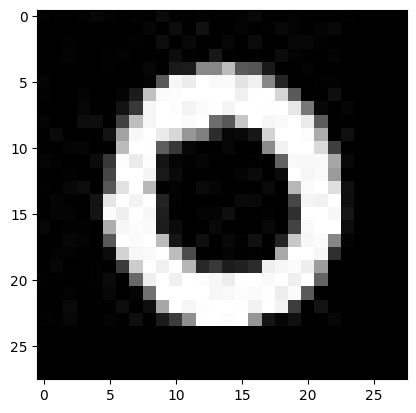

In [31]:
# fonction imshow pour afficher l'image 
import matplotlib.pyplot as plt

plt.imshow(I,cmap='gray')

Opérations de base sur une image

In [32]:
# rendre l'image un vecteur avec la fonction reshape()
I1=I.reshape(-1) # -1 pour dire que l'on ne connait pas la taille de la dimension

In [35]:
# rendre l'image un vecteur avec la fonction flatten()
I1=I.flatten()

In [36]:
# Découper une partie de l'image 
# Exemple de pixel 10 -> pixel 20 sur l'axe des x et l'axe des y
I1=I[10:20,10:20]

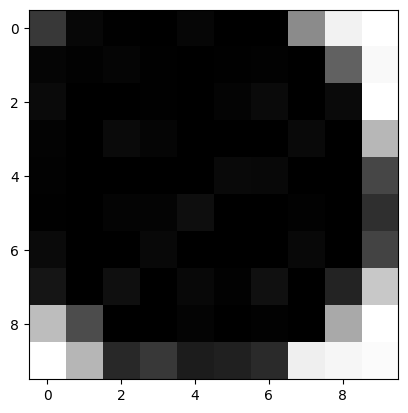

In [39]:
# Afficher I1
plt.imshow(I1,cmap='gray')

In [46]:
# Changer la resolution de l'image
# Utiliser la fonction resize
from skimage.transform import resize

I1=resize(I,(100,100))

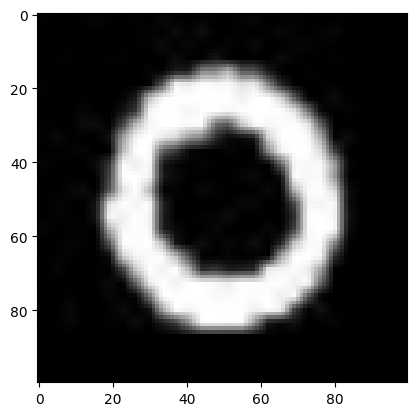

In [47]:
# Afficher I1
plt.imshow(I1,cmap='gray')

**2. Classification des images**

Nous allons effectuer la classification des images en utlisant la technique KNN.

Les données sont les images des digits 0, 1 et 2 de dataset mnist sur Google Drive.

Nous allons commencer par charger les données en utilisant les prérequis vus ci-dessus.

Puis, nous allons les préparer pour pourvoir les utiliser en classification.

**2.1. Charger les images à partir de Google Drive**

Parcourir le dossier mnist.

Structure du dossier mnist:

        mnist
          |------0
                  |----image0.jpg
                  |----image1.jpg
                  ....
          |------1
                  |----image0.jpg
                  |----image1.jpg
                  ....
          |------2
                  |----image0.jpg
                  |----image1.jpg
                  ....
                  
Vous allez mettre dans les variables suivantes :
- images : les chemins de toutes les images.
- labels : les classes (soit 0 soit 1 soit 2) auxquels appartiennent les images de la liste images

Le résultat sera normalement comme suit :

la liste images:

        ['/content/drive/MyDrive/Colab Notebooks/irm2/data/mnist/0/img_108.jpg',
        '/content/drive/MyDrive/Colab Notebooks/irm2/data/mnist/0/img_157.jpg', ...]

 la liste labels:

        ['0', '0', ....]


In [48]:
import os

data_path='./data'
images=[]
labels=[]
for classe_name in os.listdir(data_path):
  classe_path = os.path.join(data_path, classe_name)
  for file in os.listdir(classe_path):
    image_path = os.path.join(classe_path, file)
    images.append(image_path)
    labels.append(classe_name)

**2.2. Diviser les données en entrée et sortie**

Dans le problème de classification des images:
- Les images (leurs chemins) sont considérés comme les entrées
- Les labels des images sont considérés comme les sorties

Donc, donner le nom X à  la liste images et le nom y à la liste labels.

In [49]:
X=images
y=labels

**2.3. Diviser les données en train et test**

Utiliser la fonction train_test_split pour diviser X et y en train et test:

Normalment:
- les entrées X sont divisées en X_train et X_test
- les sorties y sont divisées en y_train et y_test

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.6, stratify=y)

**2.4. Traitement des données de train d'entrée**

L'image chargée en mémoire est un objet mathématique de deux dimensions (matrice).

On a besoin de la représenter sous la forme d'un vecteur pour faire apprendre un modèle de Machine Learning.

Travail demandé:

      Pour chaque image de X_train faire:
          lire une image
          Transformer l'image en vecteur
          Ajouter le vecteur dans une liste X_train_
      Transformer X_train_ en matrice (utiliser np.array())

In [51]:
from skimage.io import imread
import numpy as np
X_train_=[]
for image_path in X_train:
  I=imread(image_path)
  x=I.flatten()
  X_train_.append(x)
X_train_=np.array(X_train_)

**2.5. Apprentissage de classifieur**

Apprendre le modèle KNN avec X_train_ et y_train

In [52]:
from sklearn.neighbors  import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_,y_train)

KNeighborsClassifier(n_neighbors=2)

**2.6. Traitement des données de test d'entrée**

Appliquer le même traitement (fait sur X_train) sur X_test

Normalement, le traitement donne lieu au matrice X_test_

In [53]:
from skimage.io import imread
import numpy as np
X_test_=[]
for image_path in X_test:
  I=imread(image_path)
  x=I.flatten()
  X_test_.append(x)
X_test_=np.array(X_test_)

**2.7. Evaluation du classifieur**

Prédire les labels y_test_predicted à partir des données de test X_test_

In [54]:
y_test_predicted=knn.predict(X_test_)
y_test_predicted

array(['0', '1', '0', '1', '2', '0', '1', '1', '1', '0', '1', '2', '2',
       '2', '2', '0', '2', '0', '2', '2', '2', '1', '0', '2', '1', '1',
       '0', '0', '2', '2', '1', '1', '1', '2', '1', '1', '1', '0', '1',
       '0', '2', '1', '0', '1', '1', '0', '1', '1', '2', '2', '1', '2',
       '1', '1', '1', '2', '1', '0', '0', '0', '1', '1', '0', '2', '0',
       '1', '2', '2', '0', '1', '2', '1', '1', '0', '1', '0', '0', '2',
       '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '2', '0', '1',
       '1', '0', '1', '2', '1', '2', '0', '2', '0', '1', '0', '0', '0',
       '1', '0', '2', '0', '2', '2', '0', '2', '2', '0', '0', '0', '1',
       '2', '2', '2'], dtype='<U1')

Afficher les mesures de performance

Score accurracy

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("accuracy=%.2f" % (accuracy_score(y_test, y_test_predicted)*100))

accuracy=95.83


Matrice de confusion

In [56]:
M=confusion_matrix(y_test, y_test_predicted)
M

array([[40,  0,  0],
       [ 0, 40,  0],
       [ 1,  4, 35]], dtype=int64)

In [57]:
knn.classes_

array(['0', '1', '2'], dtype='<U1')

In [58]:
import pandas as pd

pd.DataFrame(M,
             index=knn.classes_,
             columns=knn.classes_)

,0,1,2
0,40,0,0
1,0,40,0
2,1,4,35


Rappel (recall) et précision apr classe

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.91      1.00      0.95        40
           2       1.00      0.88      0.93        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



**3. Déploiement du modèle**

**3.1. Enregistrer le modèle sur le drive**

Note : 

Utiliser les fonctions: 
- la fonction open() pour ouvrir un fichier en mode binaire+écriture. 

  Dans ce fichier, on va enregistrer notre modèle
- la fonction dump() du module pickle qui va écrire le modèle dans le fichier

In [60]:
#dump function to save the model 
from pickle import dump
dump(knn, open('knn_model.pkl', 'wb'))

**3.2. Charger le modèle à partir du Drive**

Charger le modèle à partir du Google Drive et l'utiliser pour prédire la classe d'une image quelconque ?

Note : 

Utiliser les fonctions: 
- la fonction open() pour ouvrir le fichier (en mode binaire+lecture) qui contient le modèle
- la fonction load() du module pickle pour charger le contenu du fichier ouvert et récuprérer le modèle de drive

In [61]:
# load the model from disk 
from pickle import load
knn = load(open('knn_model.pkl', 'rb'))

**3.3. Prédiction de la classe d'une nouvelle image**

Dans un script Python (.py), vous allez utiliser le modèle obtenu dans ce notebook pour décider pour une image si elle correpond au chiffre 0 , 1 ou 2

In [62]:
# test the model 
y_test_predicted=knn.predict(X_test_)
y_test_predicted

array(['0', '1', '0', '1', '2', '0', '1', '1', '1', '0', '1', '2', '2',
       '2', '2', '0', '2', '0', '2', '2', '2', '1', '0', '2', '1', '1',
       '0', '0', '2', '2', '1', '1', '1', '2', '1', '1', '1', '0', '1',
       '0', '2', '1', '0', '1', '1', '0', '1', '1', '2', '2', '1', '2',
       '1', '1', '1', '2', '1', '0', '0', '0', '1', '1', '0', '2', '0',
       '1', '2', '2', '0', '1', '2', '1', '1', '0', '1', '0', '0', '2',
       '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '2', '0', '1',
       '1', '0', '1', '2', '1', '2', '0', '2', '0', '1', '0', '0', '0',
       '1', '0', '2', '0', '2', '2', '0', '2', '2', '0', '0', '0', '1',
       '2', '2', '2'], dtype='<U1')